In [15]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10
3.10.0 (v3.10.0:b494f5935c, Oct  4 2021, 14:59:19) [Clang 12.0.5 (clang-1205.0.22.11)]
sys.version_info(major=3, minor=10, micro=0, releaselevel='final', serial=0)


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

sns.set()

In [17]:
raw_data=pd.read_csv("dataset.csv")
raw_data.head()

,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,over.react,...,weight.gain,material.possessions,introvert,popping.up.stressful.memory,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,Disorder
0,yes,yes,yes,yes,yes,yes,no,no,no,no,...,no,no,no,no,no,no,no,no,no,Anxiety
1,no,no,no,no,no,no,yes,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,Depression
2,no,no,no,no,no,no,no,no,no,no,...,yes,yes,yes,no,no,no,no,no,no,Loneliness
3,no,no,no,no,no,no,no,no,no,no,...,no,no,no,yes,yes,yes,yes,yes,yes,Stress
4,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,Normal


In [18]:
raw_data=raw_data[['feeling.nervous', 'panic','trouble.in.concentration', 'having.trouble.in.sleeping',
       'having.trouble.with.work', 'hopelessness','over.react',
       'change.in.eating', 'suicidal.thought','feeling.tired','social.media.addiction', 'weight.gain', 'material.possessions','introvert', 'popping.up.stressful.memory', 'feeling.negative','blamming.yourself','Disorder']]
raw_data.head()

,feeling.nervous,panic,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,over.react,change.in.eating,suicidal.thought,feeling.tired,social.media.addiction,weight.gain,material.possessions,introvert,popping.up.stressful.memory,feeling.negative,blamming.yourself,Disorder
0,yes,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,Anxiety
1,no,no,no,no,yes,yes,yes,yes,yes,no,no,no,no,no,no,no,no,Depression
2,no,no,no,no,no,no,no,no,no,yes,yes,yes,yes,yes,no,no,no,Loneliness
3,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,yes,yes,Stress
4,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,Normal


In [19]:
column=raw_data.columns
disorder_dict={'Normal':0,'Loneliness':1,'Anxiety':2,'Stress':3,'Depression':4}
processed_data=raw_data
for i in range(len(column)-1):
  processed_data[column[i]] = processed_data[column[i]].map({"yes":1,"no":0})
processed_data
processed_data["Disorder"]=processed_data["Disorder"].map(disorder_dict)
processed_data

,feeling.nervous,panic,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,over.react,change.in.eating,suicidal.thought,feeling.tired,social.media.addiction,weight.gain,material.possessions,introvert,popping.up.stressful.memory,feeling.negative,blamming.yourself,Disorder
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40955,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2
40956,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,4
40957,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1
40958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3


In [20]:
X=processed_data.drop(columns="Disorder")
Y=processed_data["Disorder"]

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42)

In [22]:
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)

In [23]:
accuracy = knn.score(X_test, Y_test)
print (accuracy)

1.0


In [25]:
import itertools
from sklearn.metrics import confusion_matrix
def confusion_matrix_pretified(Y_test,Y_preds, classes=False,size=(10,10)):
  figsize=size

  #create the confusion matrix
  cm= confusion_matrix(Y_test,np.round(Y_preds))
  cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] #normalize our confusion matrix
  n_classes=cm.shape[0]

  #Let's prettify it
  fig, ax= plt.subplots(figsize=figsize)

  #create a matrix plot
  cax=ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #create classes
  classes=classes
  if classes!=False:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])
  #Label the axes

  ax.set(title="Confusion Matrix",
         xlabel="Predicted Label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)
  
  #Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  #Set threshold for different colors
  threshold = (cm.max()+cm.min())/2

  #plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i,j]>threshold else "black",
             size=15)

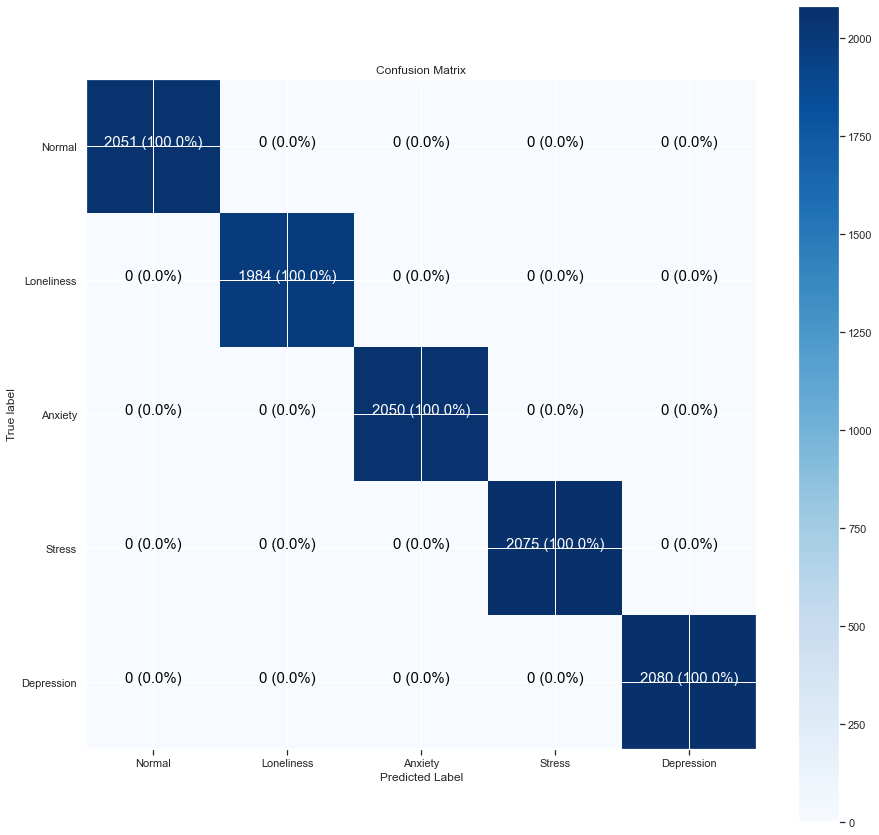

In [26]:
confusion_matrix_pretified(Y_test,knn.predict(X_test),classes=["Normal","Loneliness","Anxiety","Stress","Depression"],size=(15,15))

In [28]:

pickle.dump(knn, open("ml_model.sav", "wb"))